In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Visualizaciones y Análisis preliminares ##

In [2]:
df = pd.read_csv("Data_Final_ATP.csv")
df.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1',
       'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets',
       'Comment', 'WPts', 'LPts', 'Year', 'TorneoID', 'WinnerResult',
       'LoserResult', 'Winner_ExpectedPoints', 'Loser_ExpectedPoints',
       'WinnerKey', 'LoserKey'],
      dtype='object')

In [3]:
df.tail()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,WPts,LPts,Year,TorneoID,WinnerResult,LoserResult,Winner_ExpectedPoints,Loser_ExpectedPoints,WinnerKey,LoserKey
25069,54,St. Petersburg,St. Petersburg Open,2016-09-23,ATP250,Indoor,Hard,Quarterfinals,3,Zverev A.,...,1425,846,2016,St. Petersburg Open_2016,Next Round,Quarterfinals,0,50,ATP250_Next Round,ATP250_Quarterfinals
25070,54,St. Petersburg,St. Petersburg Open,2016-09-23,ATP250,Indoor,Hard,Quarterfinals,3,Wawrinka S.,...,6260,1295,2016,St. Petersburg Open_2016,Next Round,Quarterfinals,0,50,ATP250_Next Round,ATP250_Quarterfinals
25071,54,St. Petersburg,St. Petersburg Open,2016-09-24,ATP250,Indoor,Hard,Semifinals,3,Zverev A.,...,1425,3390,2016,St. Petersburg Open_2016,Next Round,Semifinals,0,100,ATP250_Next Round,ATP250_Semifinals
25072,54,St. Petersburg,St. Petersburg Open,2016-09-24,ATP250,Indoor,Hard,Semifinals,3,Wawrinka S.,...,6260,1950,2016,St. Petersburg Open_2016,Next Round,Semifinals,0,100,ATP250_Next Round,ATP250_Semifinals
25073,54,St. Petersburg,St. Petersburg Open,2016-09-25,ATP250,Indoor,Hard,The Final,3,Zverev A.,...,1425,6260,2016,St. Petersburg Open_2016,Champion,Runner-Up,250,165,ATP250_Champion,ATP250_Runner-Up


1. Distribución de torneos por tipo

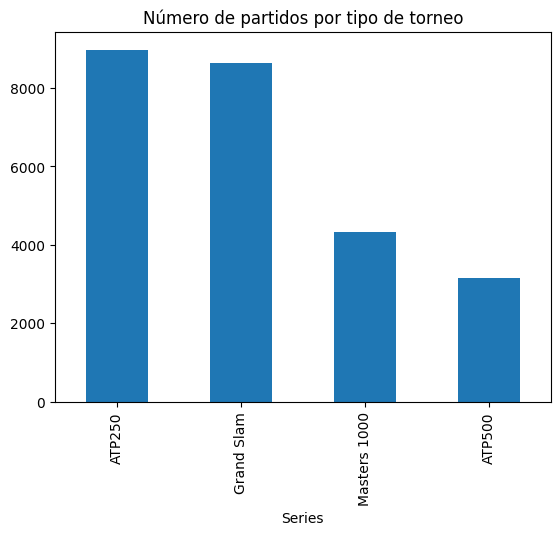

In [4]:
df["Series"].value_counts().plot(kind="bar")
plt.title("Número de partidos por tipo de torneo")
plt.show()

2. Superficies más comunes en los torneos.

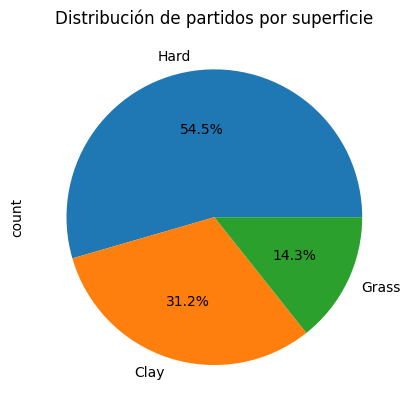

In [5]:
df["Surface"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribución de partidos por superficie")
plt.show()

**Se observa que tenemos más partidos jugados en superficie dura, que en pasto o en tierra batida.**

3. Histograma de rankings de los ganadores de los partidos (no de los torneos)

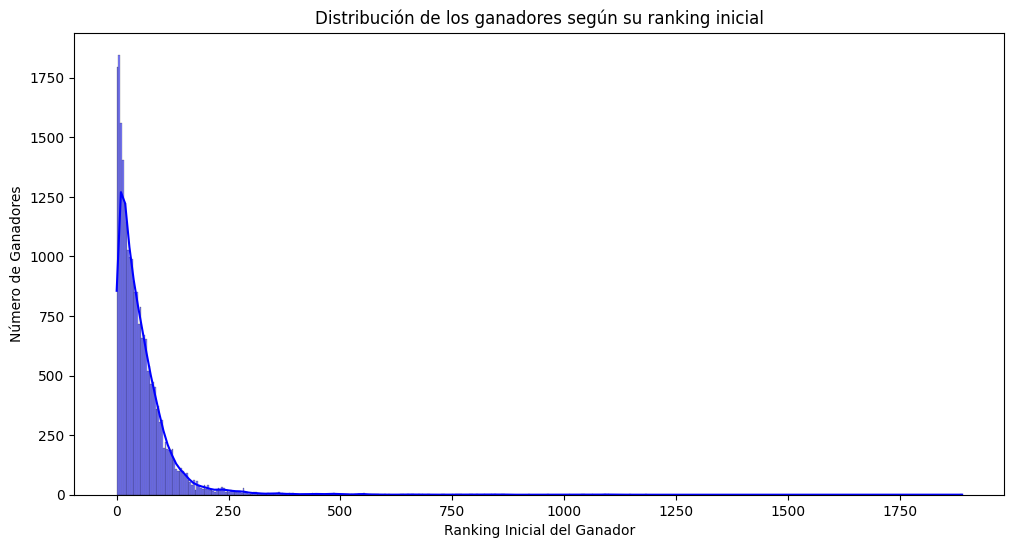

In [53]:
plt.figure(figsize=(12, 6))
sns.histplot(df['WRank'], kde=True, color='blue')
plt.title('Distribución de los ganadores según su ranking inicial')
plt.xlabel('Ranking Inicial del Ganador')
plt.ylabel('Número de Ganadores')
plt.show()

**Se observa que la mayoría de los ganadores están concentrados en los rankings más altos**

4. Ranking de los ganadores de los partidos según la superficie del torneo

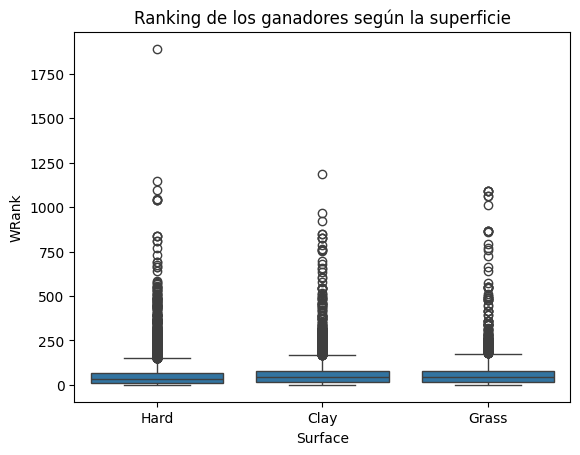

In [ ]:
sns.boxplot(x="Surface", y="WRank", data=df)
plt.title("Ranking de los ganadores según la superficie")
plt.show()

Podemos observar que la mayoría de los partidos son ganados por jugadores de rankings más altos, sin embargo, hay una buena cantidad de outliers, correspondientes a jugadores de rangos bajos que ganan partidos en estos torneos. 

Ahora veamos quienes son los que ganan los torneos.

Para poder observar esto, necesitamos obtener los resultados correspondientes solo a las finales. Primero observaremos si en la columna Round, todas las finales tienen el mismo nombre, para así poder filtrar correctamente, en caso de que no, transformaremos esta variable.

In [14]:
finales = df["Round"].unique()
print(finales)

['1st Round' '2nd Round' '3rd Round' '4th Round' 'Quarterfinals'
 'Semifinals' 'The Final']


Vemos que todas las finales están denominadas como "The Final", por lo que podemos filtrar correctamente.

In [15]:
finals_winners = df[df["Round"] == "The Final"][["Tournament", "Winner", "WRank"]]
print(finals_winners)

                                         Tournament            Winner  WRank
126                                 Australian Open         Agassi A.      1
253                                     French Open        Kuerten G.      5
380                                       Wimbledon        Sampras P.      3
507                                         US Open          Safin M.      7
634                                 Australian Open         Agassi A.      6
...                                             ...               ...    ...
24845    Western & Southern Financial Group Masters          Cilic M.     14
24892  Winston-Salem Open at Wake Forest University  Carreno Busta P.     49
25019                                       US Open       Wawrinka S.      3
25046                               Open de Moselle        Pouille L.     18
25073                           St. Petersburg Open         Zverev A.     27

[533 rows x 3 columns]


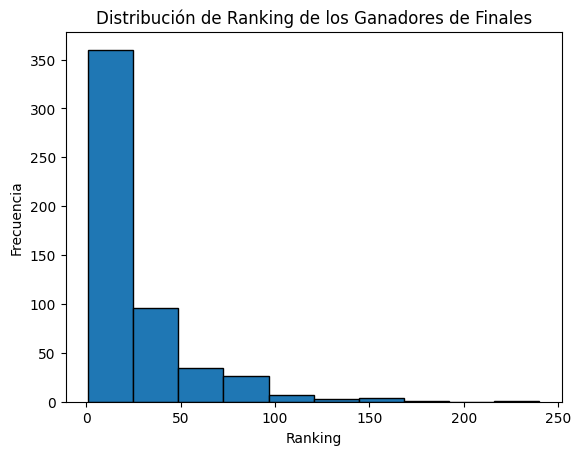

In [41]:
plt.hist(finals_winners["WRank"], bins=10, edgecolor="black")
plt.title("Distribución de Ranking de los Ganadores de Finales")
plt.xlabel("Ranking")
plt.ylabel("Frecuencia")
plt.show()

Podemos ver que la mayoría de los ganadores de estos torneos son pertenecientes a los rankings altos en el momento del torneo, sin embargo, también es posible observar algunos jugadores de bajo ranking ganando estos torneos.

Ahora observaremos en qué superficie ganan más torneos jugadores con ranking bajos.

Primero definiremos ranking "bajo" a jugadores por sobre el ranking 50, aunque si bien realmente no es un ranking bajo como tal, puesto que son de los mejores jugadores del mundo, para lo que se suele ver en este tipo de torneos si se podría considerar bajo.

In [42]:
low_rank_winners = df[(df["WRank"] > 50) & (df["Round"] == "The Final")]
surface_counts = low_rank_winners["Surface"].value_counts()
print(surface_counts)

Surface
Clay     37
Hard     23
Grass    13
Name: count, dtype: int64


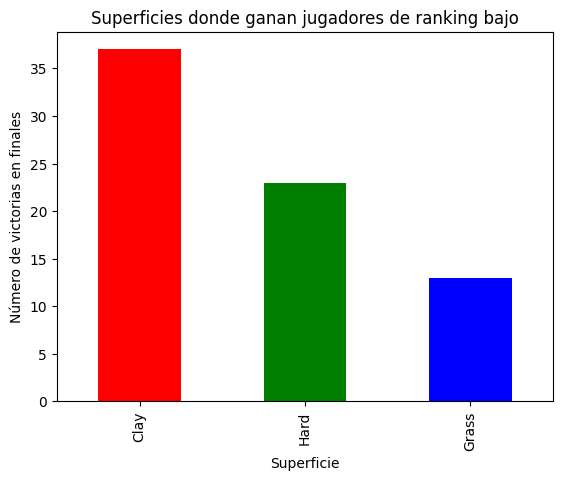

In [43]:
surface_counts.plot(kind="bar", color=["red", "green", "blue", "gray"])
plt.title("Superficies donde ganan jugadores de ranking bajo")
plt.xlabel("Superficie")
plt.ylabel("Número de victorias en finales")
plt.show()

In [45]:
high_rank_winners = df[(df["WRank"] <= 50) & (df["Round"] == "The Final")]
comparison = pd.DataFrame({
    "Ranking bajo (>50)": low_rank_winners["Surface"].value_counts(),
    "Ranking alto (≤50)": high_rank_winners["Surface"].value_counts()
}).fillna(0)

print(comparison)

         Ranking bajo (>50)  Ranking alto (≤50)
Surface                                        
Clay                     37                 149
Grass                    13                  46
Hard                     23                 265


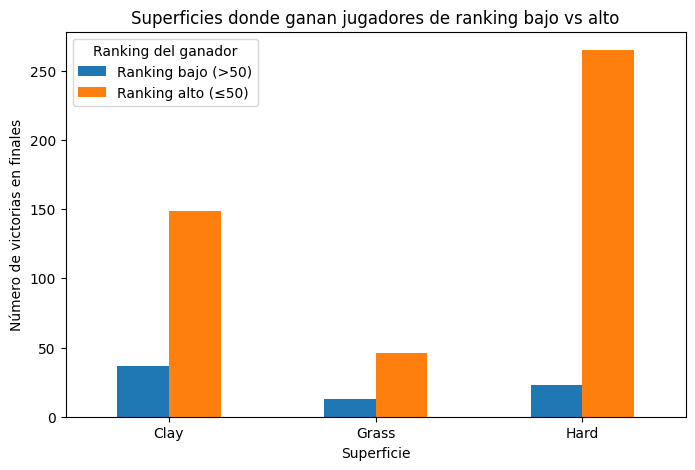

In [46]:
comparison.plot(kind="bar", figsize=(8,5))
plt.title("Superficies donde ganan jugadores de ranking bajo vs alto")
plt.xlabel("Superficie")
plt.ylabel("Número de victorias en finales")
plt.xticks(rotation=0)
plt.legend(title="Ranking del ganador")
plt.show()

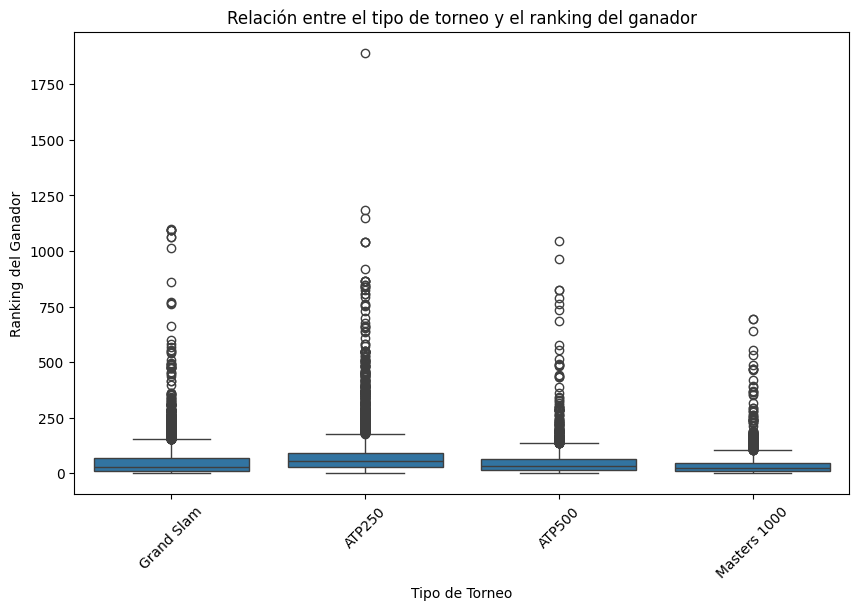

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Series', y='WRank')
plt.title('Relación entre el tipo de torneo y el ranking del ganador')
plt.xlabel('Tipo de Torneo')
plt.ylabel('Ranking del Ganador')
plt.xticks(rotation=45)
plt.show()

Para ver un estilo de torneo en específico, veamos como se distribuyen las superficies en los torneos Masters 1000.

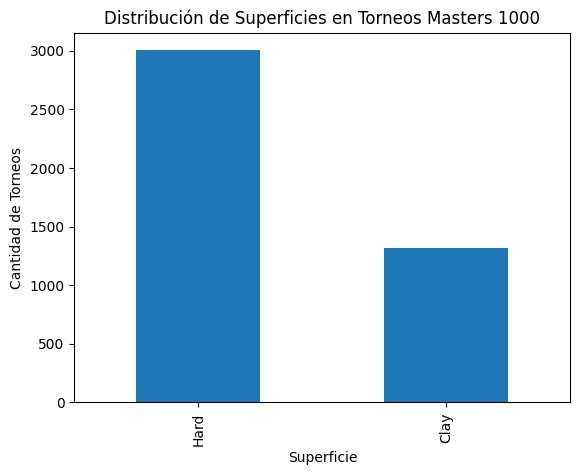

In [47]:
df[df["Series"] == "Masters 1000"]["Surface"].value_counts().plot(kind="bar")
plt.title("Distribución de Superficies en Torneos Masters 1000")
plt.xlabel("Superficie")
plt.ylabel("Cantidad de Torneos")
plt.show()

**Observamos que tenemos más torneos Masters 1000 en superficies duras que en tierra batida y ninguno en pasto**

Veamos cuantos partidos hay por cada Masters 1000.

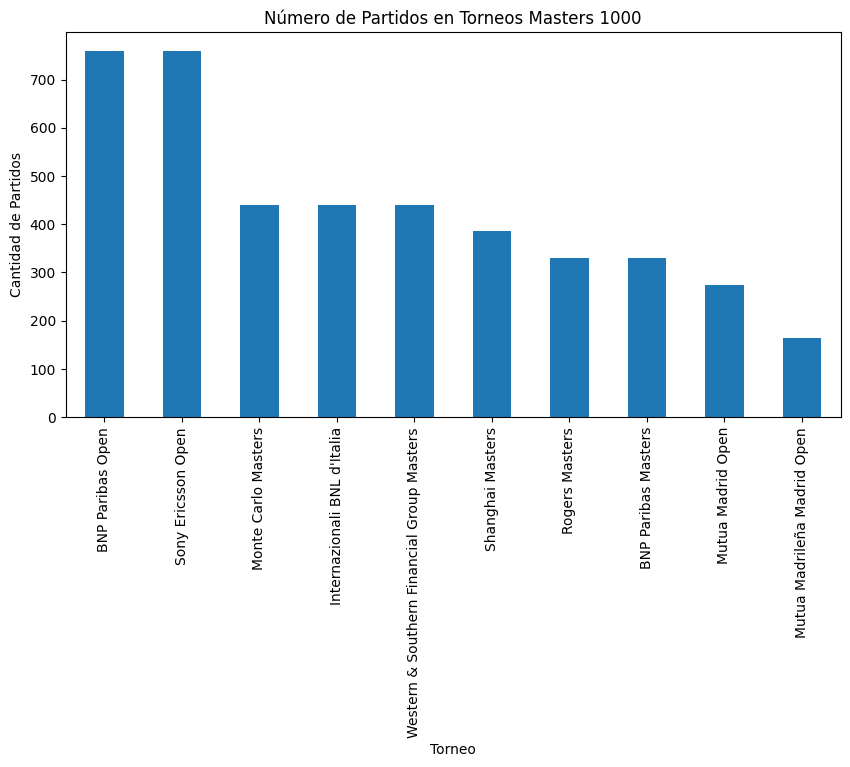

In [36]:
df[df["Series"] == "Masters 1000"]["Tournament"].value_counts().plot(kind="bar", figsize=(10,5))
plt.title("Número de Partidos en Torneos Masters 1000")
plt.xlabel("Torneo")
plt.ylabel("Cantidad de Partidos")
plt.xticks(rotation=90)  # Rotar nombres si son largos
plt.show()

Revisaremos ahora cuantos comentarios se han hecho por partido, es decir, si ocurrió algo inusual.

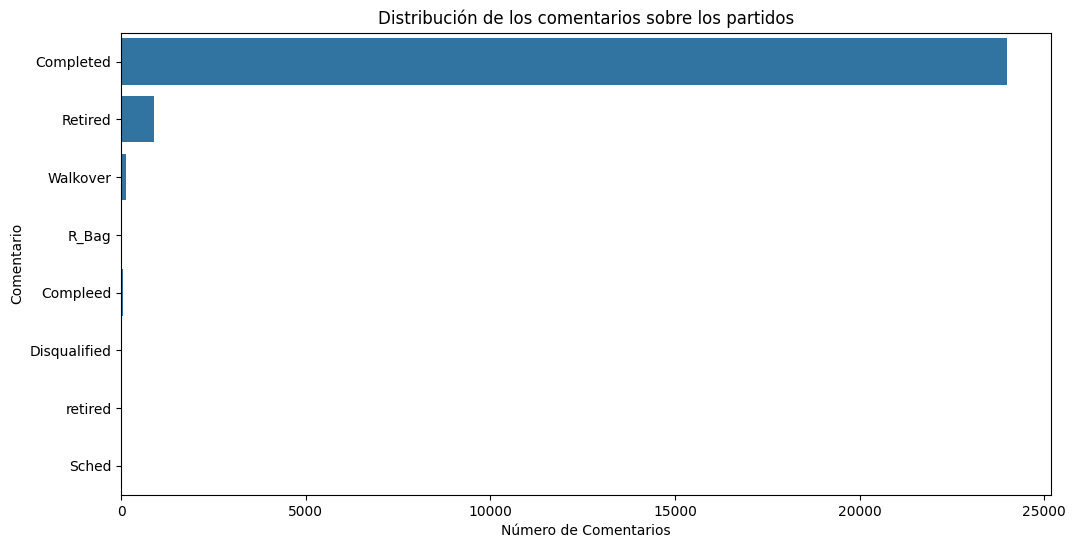

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Comment')
plt.title('Distribución de los comentarios sobre los partidos')
plt.xlabel('Número de Comentarios')
plt.ylabel('Comentario')
plt.show()

Comparación entre el tipo de superficie y si es outdoor o indoor.

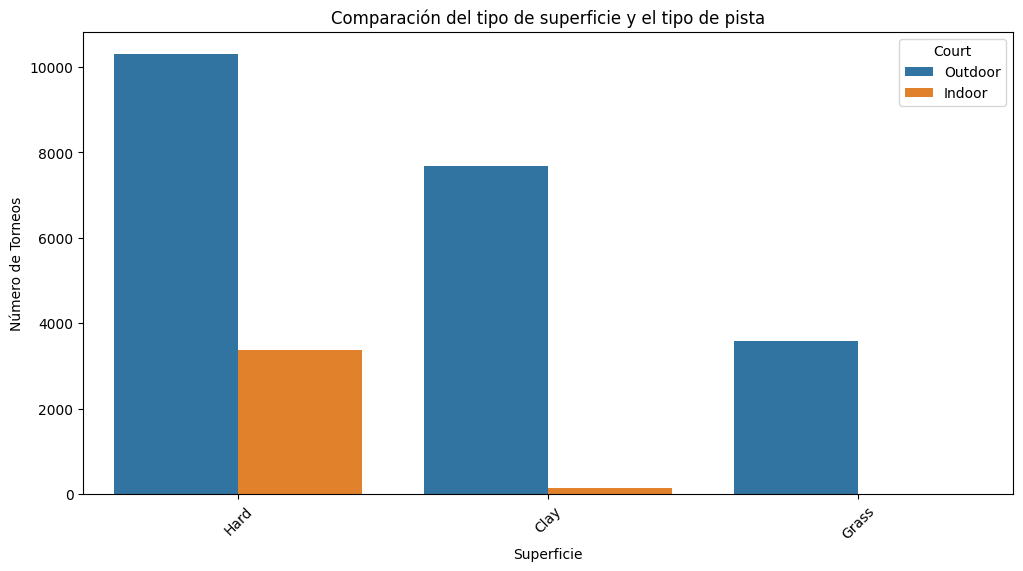

In [62]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Surface', hue='Court')
plt.title('Comparación del tipo de superficie y el tipo de pista')
plt.xlabel('Superficie')
plt.ylabel('Número de Torneos')
plt.xticks(rotation=45)
plt.show()